In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%cd ../child-mind-institute-problematic-internet-use/

c:\Users\NanaChang\OneDrive\文件\UCSD\ECE 225A\project_visuazlization\child-mind-institute-problematic-internet-use


In [21]:
data = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data_dictionary = pd.read_csv("data_dictionary.csv")

# Discard no label data
data = data.dropna(subset=["sii"])

display(data)
display(data_dictionary)

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,Fall,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,...,2.0,2.0,1.0,22.0,Fall,41.0,58.0,Fall,2.0,0.0
3954,ff759544,Summer,7,1,NaN,NaN,Summer,13.927006,48.5,46.6,...,3.0,3.0,0.0,33.0,Summer,48.0,67.0,Summer,0.0,1.0
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0


,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
...,...,...,...,...,...,...
76,Sleep Disturbance Scale,SDS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
77,Sleep Disturbance Scale,SDS-SDS_Total_Raw,Total Raw Score,int,NaN,NaN
78,Sleep Disturbance Scale,SDS-SDS_Total_T,Total T-Score,int,NaN,NaN
79,Internet Use,PreInt_EduHx-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


Text(0, 0.5, 'Sevirity Impairment Index (sii)')

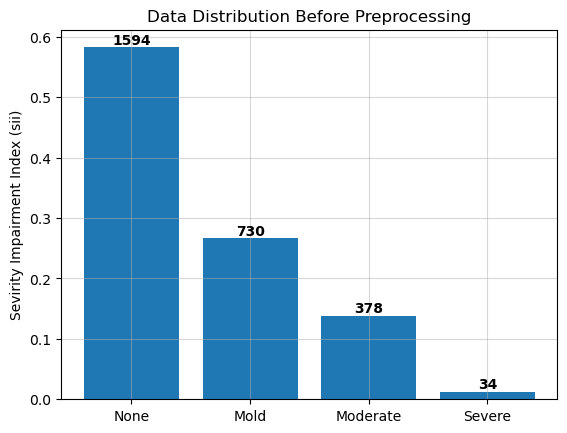

In [22]:
data_0 = data[data["sii"] == 0]
data_1 = data[data["sii"] == 1]
data_2 = data[data["sii"] == 2]
data_3 = data[data["sii"] == 3]
sii_label = ["None", "Mold", "Moderate", "Severe"]
data_len = [len(data_0), len(data_1), len(data_2), len(data_3)]
fig, ax = plt.subplots()
ax.bar(sii_label, [val / sum(data_len) for val in data_len])
for idx, bar in enumerate(ax.patches):
    ax.text(bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.005 + bar.get_y(),
        data_len[idx], ha = 'center',
        color = 'k', weight = 'bold', size = 10)
plt.grid(alpha=0.5)
plt.title("Data Distribution Before Preprocessing")
plt.ylabel("Sevirity Impairment Index (sii)")

In [23]:
# Preprocessing
data = data[data.loc[:, "BIA-BIA_Fat"].between(0, 200, inclusive="both")]

# data = data[data.loc[:, ]]
display(data)

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0
6,0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.0,84.6,...,4.0,1.0,0.0,20.0,Winter,27.0,40.0,Fall,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,ff60112d,Summer,15,0,Spring,40.0,Winter,26.364710,70.5,186.4,...,1.0,1.0,1.0,35.0,Spring,66.0,90.0,Summer,3.0,1.0
3953,ff6c2bb8,Fall,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,...,2.0,2.0,1.0,22.0,Fall,41.0,58.0,Fall,2.0,0.0
3954,ff759544,Summer,7,1,NaN,NaN,Summer,13.927006,48.5,46.6,...,3.0,3.0,0.0,33.0,Summer,48.0,67.0,Summer,0.0,1.0
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0


Text(0, 0.5, 'Sevirity Impairment Index (sii)')

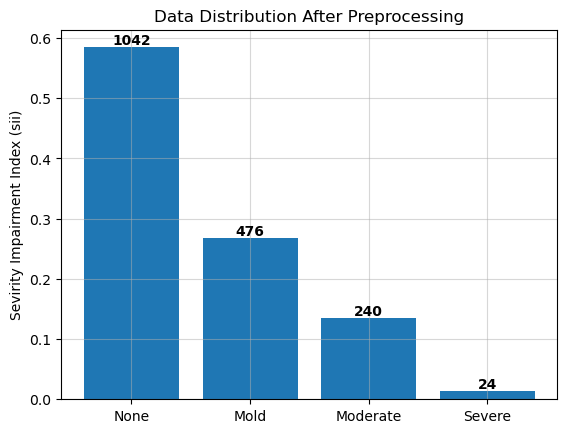

In [24]:
data_0 = data[data["sii"] == 0]
data_1 = data[data["sii"] == 1]
data_2 = data[data["sii"] == 2]
data_3 = data[data["sii"] == 3]
sii_label = ["None", "Mold", "Moderate", "Severe"]
data_len = [len(data_0), len(data_1), len(data_2), len(data_3)]
fig, ax = plt.subplots()
ax.bar(sii_label, [val / sum(data_len) for val in data_len])
for idx, bar in enumerate(ax.patches):
    ax.text(bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.005 + bar.get_y(),
        data_len[idx], ha = 'center',
        color = 'k', weight = 'bold', size = 10)
plt.grid(alpha=0.5)
plt.title("Data Distribution After Preprocessing")
plt.ylabel("Sevirity Impairment Index (sii)")

In [41]:
print(len(data.columns))
print(data.columns)

82
Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_L

25


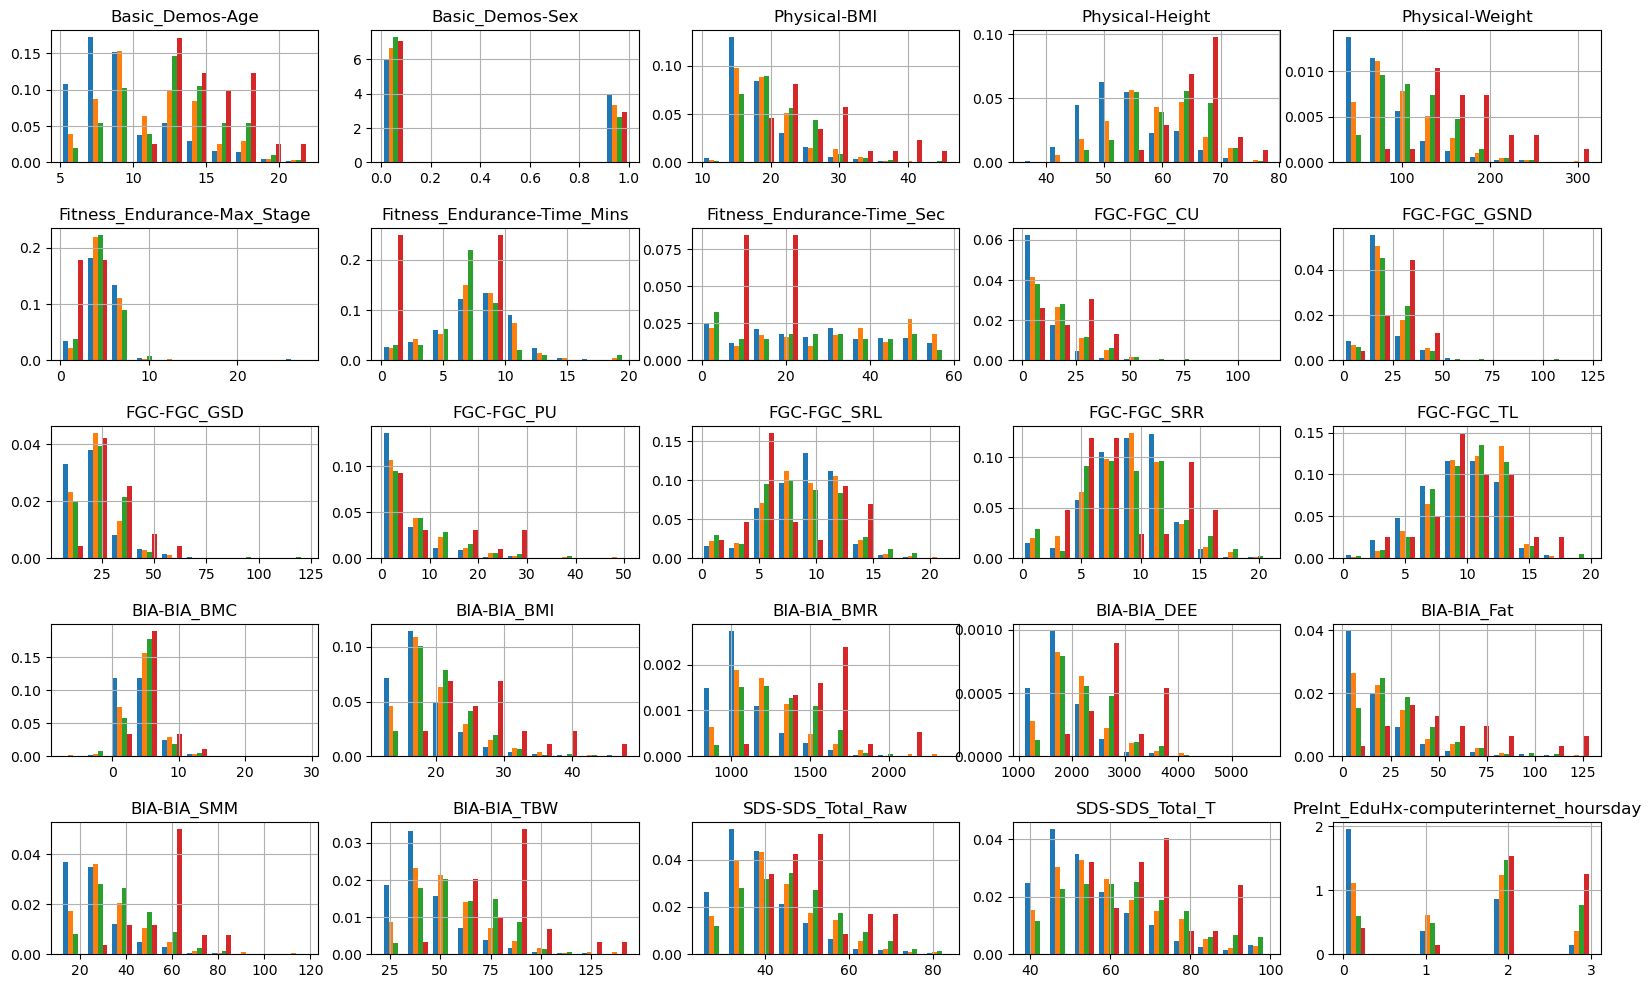

In [38]:
interested_item = ["Basic_Demos-Age", "Basic_Demos-Sex",
                   "Physical-BMI", "Physical-Height", "Physical-Weight",
                   "Fitness_Endurance-Max_Stage", "Fitness_Endurance-Time_Mins", "Fitness_Endurance-Time_Sec",
                   "FGC-FGC_CU", "FGC-FGC_GSND", "FGC-FGC_GSD", "FGC-FGC_PU", "FGC-FGC_SRL", "FGC-FGC_SRR", "FGC-FGC_TL",
                   "BIA-BIA_BMC", "BIA-BIA_BMI", "BIA-BIA_BMR", "BIA-BIA_DEE", "BIA-BIA_Fat", "BIA-BIA_SMM", "BIA-BIA_TBW",
                   "SDS-SDS_Total_Raw", "SDS-SDS_Total_T", 
                   "PreInt_EduHx-computerinternet_hoursday"]
print(len(interested_item))

plt.figure(figsize=(20, 12))
for iitem in range(len(interested_item)):
    plt.subplot(5, 5, iitem + 1)
    plt.hist([data_0[interested_item[iitem]],  data_1[interested_item[iitem]],  data_2[interested_item[iitem]], data_3[interested_item[iitem]]], density=True)
    plt.title(interested_item[iitem])
    plt.grid()

plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()

In [36]:
display(data_3[["id", "Basic_Demos-Age", "Physical-BMI", "Fitness_Endurance-Max_Stage", "Fitness_Endurance-Time_Mins", "Fitness_Endurance-Time_Sec", "FGC-FGC_CU", "BIA-BIA_BMC"]])

,id,Basic_Demos-Age,Physical-BMI,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-FGC_CU,BIA-BIA_BMC
306,11f7253c,16,46.102914,NaN,NaN,NaN,11.0,7.43478
370,157b271f,15,20.900479,NaN,NaN,NaN,0.0,5.02105
487,1c481537,13,27.941504,NaN,NaN,NaN,15.0,5.70718
868,343460ab,12,30.630714,NaN,NaN,NaN,20.0,6.57274
894,35fa2ebf,13,20.404192,NaN,NaN,NaN,25.0,2.93395
1107,43d43363,16,18.334414,NaN,NaN,NaN,24.0,7.48407
1454,5a8712ae,17,22.551125,NaN,NaN,NaN,28.0,6.66267
1860,75f26948,21,35.892056,NaN,NaN,NaN,NaN,5.16064
1907,792d2fa5,13,23.628408,NaN,NaN,NaN,9.0,4.50267
2005,7f950ef2,17,21.862781,NaN,NaN,NaN,37.0,1.23965


21


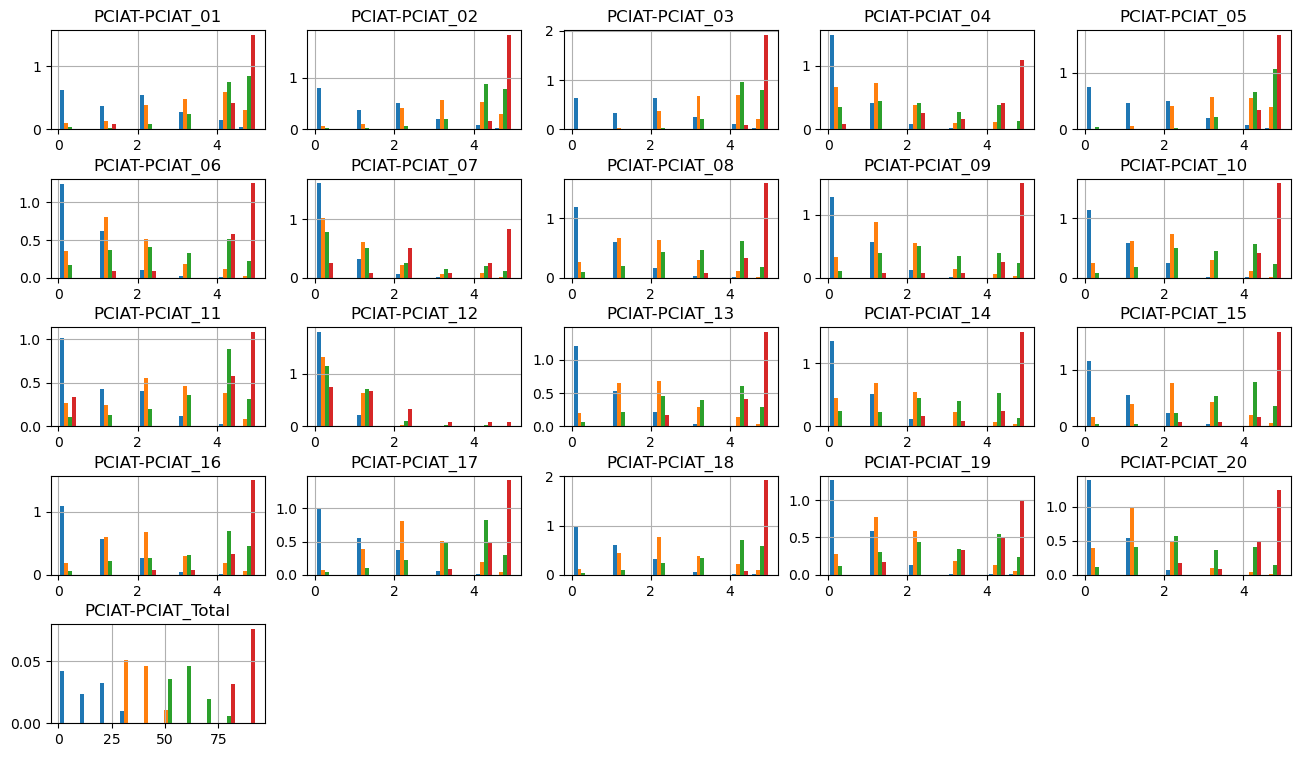

In [ ]:
# Not input
interested_item = ["PCIAT-PCIAT_" + str(n + 1).zfill(2) for n in range(20)]
interested_item.append("PCIAT-PCIAT_Total")
print(len(interested_item))

plt.figure(figsize=(16, 9))
for iitem in range(len(interested_item)):
    plt.subplot(5, 5, iitem + 1)
    plt.hist([data_0[interested_item[iitem]],  data_1[interested_item[iitem]],  data_2[interested_item[iitem]], data_3[interested_item[iitem]]], density=True)
    plt.title(interested_item[iitem])
    plt.grid()

plt.subplots_adjust(hspace=0.5)
plt.show()

# Physiological Data Visualization

In [5]:
weekday_dic = {
    1: "Mon", 2: "Tues", 3: "Wed", 4: "Thurs", 5: "Fri", 6: "Sat", 7: "Sun"
}

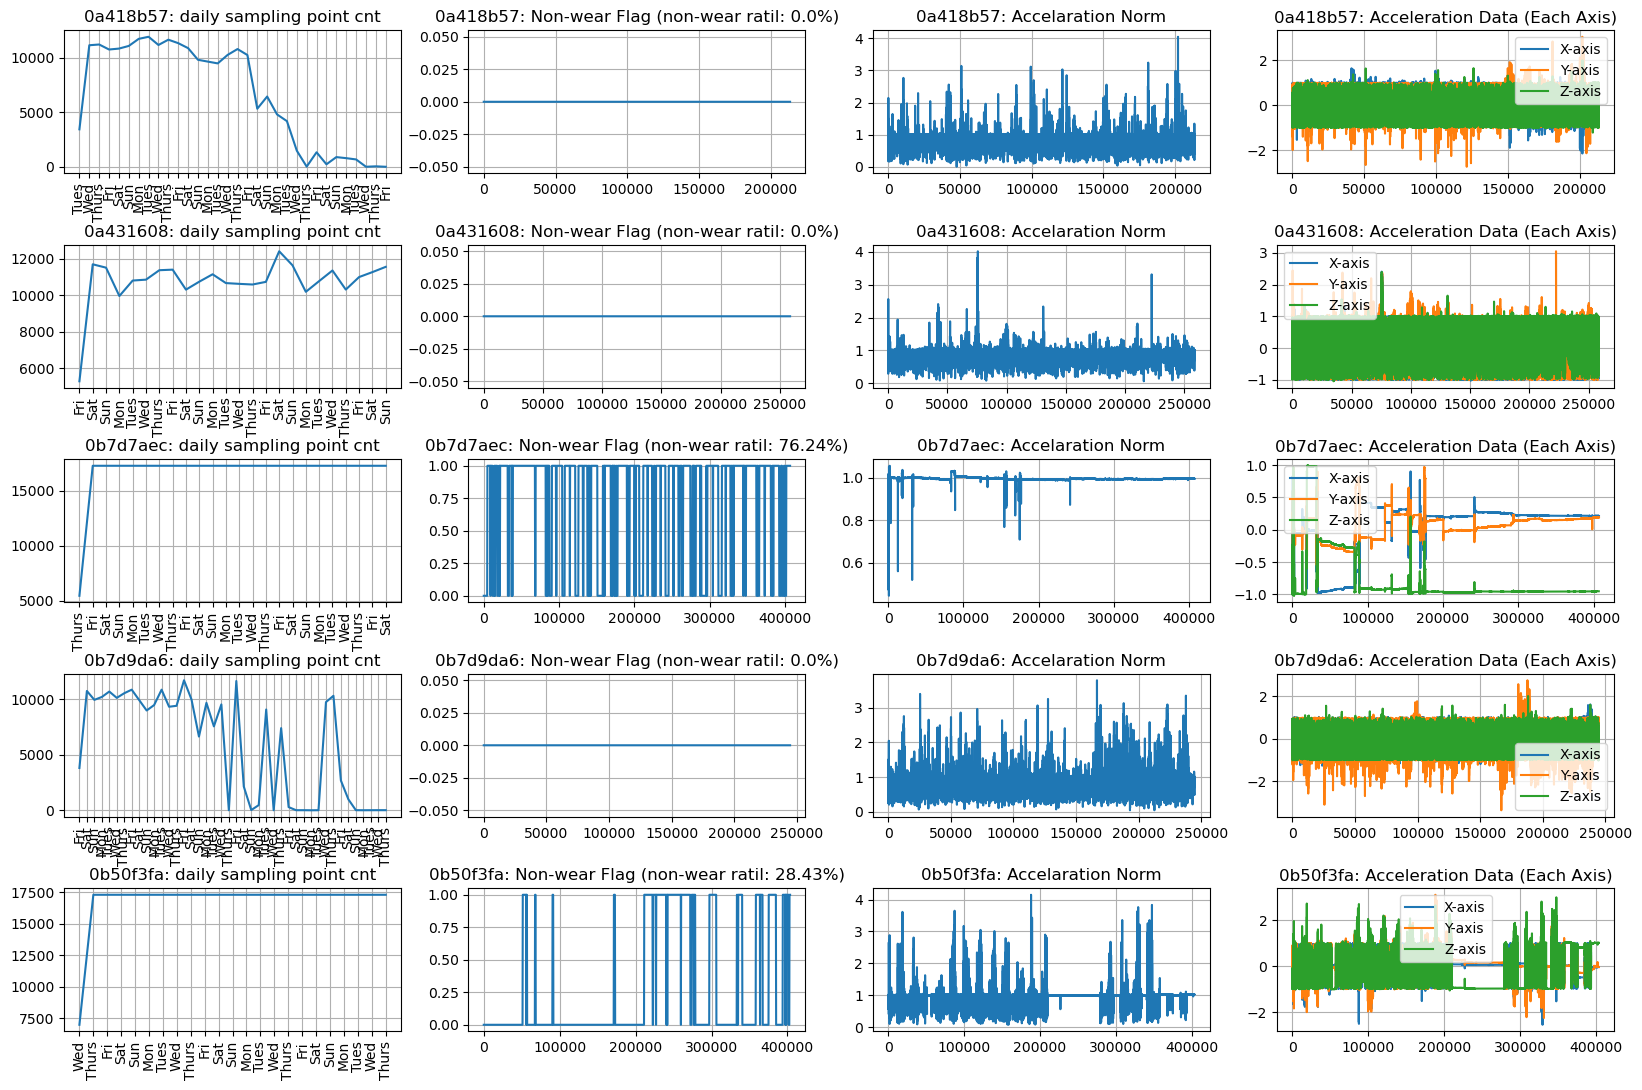

In [ ]:
# A brief plotout for the first 5 ids
id_lst = ["0a418b57", "0a431608", "0b7d7aec", "0b7d9da6", "0b50f3fa"]

plt.figure(figsize=(20, 13))
plot_feat_cnt = 4
for iid, id in enumerate(id_lst):
    parq = pd.read_parquet('series_train.parquet/id=' + id + '/part-0.parquet', engine='pyarrow')

    # Plot daily sampling point cnt
    wd = parq["weekday"]
    cnt = 0
    day_pt_cnt = []
    day_pt = []
    for idx in range(len(wd) - 1):
        if wd[idx] != wd[idx + 1]:
            day_pt_cnt.append(cnt)
            day_pt.append(weekday_dic[wd[idx]])
            cnt = 0
        else:
            cnt += 1
    plt.subplot(len(id_lst), plot_feat_cnt, 1 + iid * plot_feat_cnt)
    plt.plot(day_pt_cnt)
    plt.xticks(np.arange(len(day_pt_cnt)), day_pt, rotation=90)
    plt.title(id + ": daily sampling point cnt")
    plt.grid()

    # Plot non-wear flag
    plt.subplot(len(id_lst), plot_feat_cnt, 2 + iid * plot_feat_cnt)
    plt.plot(parq["non-wear_flag"])
    non_wear_ratio = sum(parq["non-wear_flag"]) / len(parq["non-wear_flag"])
    plt.title(id + ": Non-wear Flag (non-wear ratio: " + str(int(non_wear_ratio * 10000) / 100) + "%)")
    plt.grid()

    # Plot norm of acceleration
    plt.subplot(len(id_lst), plot_feat_cnt, 3 + iid * plot_feat_cnt)
    acc_norm = [np.sqrt(parq["X"][n] ** 2 + parq["Y"][n] ** 2 + parq["Z"][n] ** 2)for n in range(len(parq["X"]))]
    plt.plot(acc_norm)
    plt.grid()
    plt.title(id + ": Accelaration Norm")

    # Plot each axis of Acceleration
    plt.subplot(len(id_lst), plot_feat_cnt, 4 + iid * plot_feat_cnt)
    plt.plot(parq["X"], label="X-axis")
    plt.plot(parq["Y"], label="Y-axis")
    plt.plot(parq["Z"], label="Z-axis")
    plt.legend()
    plt.grid()
    plt.title(id + ": Acceleration Data (Each Axis)")

plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()
    

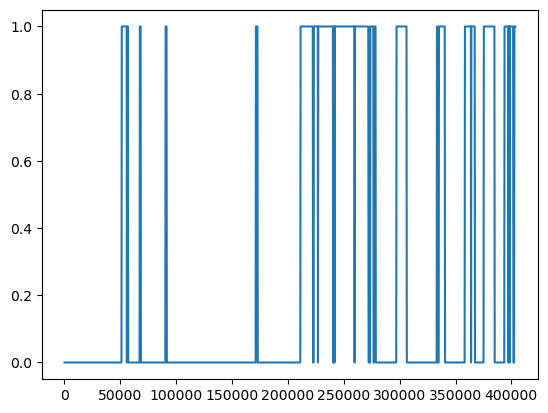

In [114]:
plt.plot(parq["non-wear_flag"])

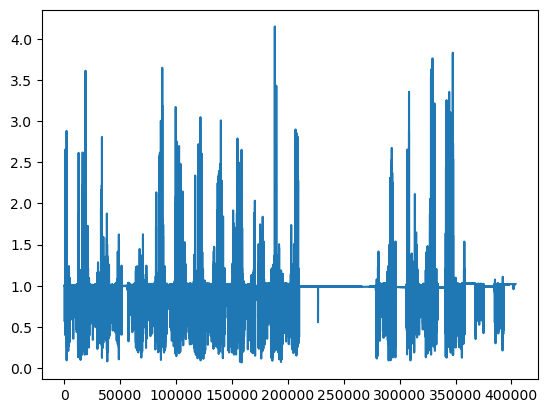

In [112]:
plt.plot([np.sqrt(parq["X"][n] ** 2 + parq["Y"][n] ** 2 + parq["Z"][n] ** 2) for n in range(len(parq["X"]))])

([<matplotlib.axis.XTick at 0x1680dbd07c0>,
 [Text(0, 0, 'Wed'),
  Text(1, 0, 'Thurs'),
  Text(2, 0, 'Fri'),
  Text(3, 0, 'Sat'),
  Text(4, 0, 'Sun'),
  Text(5, 0, 'Mon'),
  Text(6, 0, 'Tues'),
  Text(7, 0, 'Wed'),
  Text(8, 0, 'Thurs'),
  Text(9, 0, 'Fri'),
  Text(10, 0, 'Sat'),
  Text(11, 0, 'Sun'),
  Text(12, 0, 'Mon'),
  Text(13, 0, 'Tues'),
  Text(14, 0, 'Wed'),
  Text(15, 0, 'Thurs'),
  Text(16, 0, 'Fri'),
  Text(17, 0, 'Sat'),
  Text(18, 0, 'Sun'),
  Text(19, 0, 'Mon'),
  Text(20, 0, 'Tues'),
  Text(21, 0, 'Wed'),
  Text(22, 0, 'Thurs')])

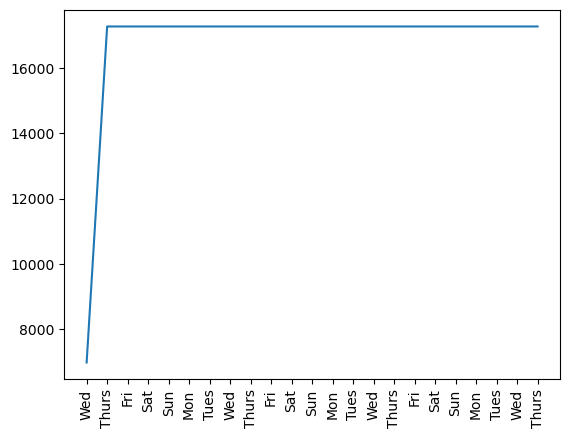

In [117]:
wd = parq["weekday"]
cnt = 0
day_pt_cnt = []
day_pt = []
for idx in range(len(wd) - 1):
    if wd[idx] != wd[idx + 1]:
        day_pt_cnt.append(cnt)
        day_pt.append(weekday_dic[wd[idx]])
        cnt = 0
    else:
        cnt += 1

plt.plot(day_pt_cnt)
plt.xticks(np.arange(len(day_pt_cnt)), day_pt, rotation=90)


In [115]:
print(day_pt_cnt)

[6971, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279]


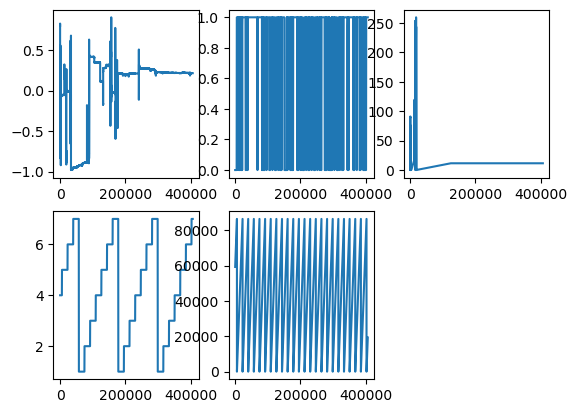

In [106]:
plt.subplot(2, 3, 1)
plt.plot(parq["X"])
plt.subplot(2, 3, 2)
plt.plot(parq["non-wear_flag"])
plt.subplot(2, 3, 3)
plt.plot(parq["light"])
plt.subplot(2, 3, 4)
plt.plot(parq["weekday"])
plt.subplot(2, 3, 5)
plt.plot(parq["time_of_day"] / 1e9)